<center>
<p style="text-align: center;"><b><i>Credit Card Fraud Detection: Enhancing Financial Security with Machine Learning</i></b></p>
</center>

<center>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*edBhpHPBz0Tfv02z5dbItw.jpeg" alt="Credit Card Fraud Detection">
</center>


## Dataset Overview

**Data Description :** <br>
The dataset contains anonymized credit card transactions made by European cardholders. It includes features derived from transaction data, and the `Class` column indicates whether a transaction is fraudulent or legitimate.<br>


**Features :** <br>
* **Time**: Time elapsed since the first transaction in seconds.
* **V1 to V28**: Anonymized features derived from transaction data. These are numerical and represent various characteristics of the transactions.
* **Amount**: The monetary value of the transaction.
* **Class**: Label indicating whether the transaction is fraudulent (1) or legitimate (0).


**Data URL :** <br>
You can find the dataset on Kaggle: <br>
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


## Importing the necessary libraries

In [6]:
# For data manipulation and analysis
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# For machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For managing the display of visualizations
%matplotlib inline


## Data Understanding

In [8]:
# Loading the dataset 
df = pd.read_csv("creditcard.csv")

In [9]:
pd.options.display.max_columns = None

In [10]:
# Display the first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Data size
df.shape

(284807, 31)

In [12]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 284807 rows and 31 columns.


In [13]:
# Dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# Data types of each column
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
# Count the number of occurrences of elements in df
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [16]:
# List columns
df.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [17]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Preprocessing

In [19]:
# Checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Insight:** <br>
*   No missing values detected

In [21]:
# Checking the number of duplicate rows in the DataFrame
df.duplicated().sum()

1081

In [22]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [23]:
# Verify that there are no duplicate rows left in the DataFrame
df.duplicated().sum()

0

In [24]:
df.shape

(283726, 31)

**Insight:** <br>
*   The 'Amount' column has values with a wide range of variability, so we normalize it to prevent these large differences from disproportionately affecting the model's learning.

In [26]:
# Initializing the scaler
sc = StandardScaler()

# Applying the scaler to the 'Amount' column
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [28]:
# Dropping the 'Time' column as it's not needed for analysis
df = df.drop(['Time'], axis = 1)

In [29]:
# Checking the distribution of the target variable (Class)
# 0 represents non-fraudulent transactions, and 1 represents fraudulent transactions
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

**Insight:** <br>
*   This Dataset is highly unbalanced

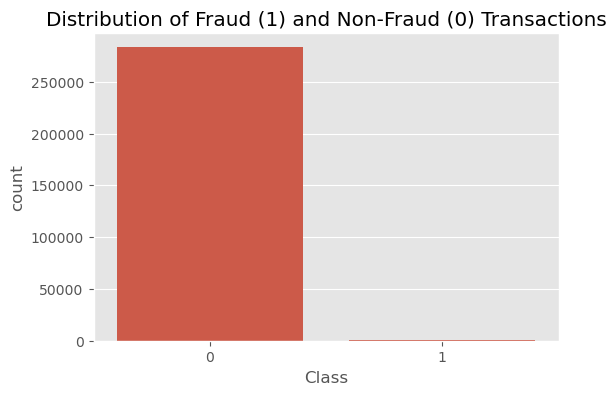

In [31]:
# Plotting the distribution of the 'Class' column
plt.figure(figsize=(6,4))  # Adjust figure size if needed
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud (1) and Non-Fraud (0) Transactions')
plt.show()

## Handling Imbalanced Dataset

In [33]:
# Split data into features (X) and target (y)
X = df.drop('Class', axis = 1)
y = df['Class']

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9991541254009093

 Precision: 0.875

 Recall: 0.5444444444444444

 F1 Score: 0.6712328767123288

==========Decision Tree Classifier===========

 Accuaracy: 0.9991012582384662

 Precision: 0.7142857142857143

 Recall: 0.7222222222222222

 F1 Score: 0.7182320441988951


### Undersampling

In [37]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [38]:
normal.shape

(283253, 30)

In [39]:
fraud.shape

(473, 30)

In [40]:
normal_sample = normal.sample(n=473)

In [41]:
normal_sample.shape

(473, 30)

In [42]:
df_new = pd.concat([normal_sample,fraud],ignore_index=True)

In [43]:
df_new["Class"].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [44]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.898030,-2.301413,0.102450,-1.477420,-2.316841,0.177161,-2.001741,0.214793,-0.587166,1.609882,0.218703,-0.484833,0.089950,-0.690925,-0.095630,0.500436,-0.180450,1.371063,-0.225401,-0.114521,0.184848,0.683998,0.093748,-0.352796,-0.597958,-0.105398,0.043868,-0.013443,0.321596,0
1,-1.068166,-0.803213,-0.555222,-0.566300,-0.638469,-0.417046,3.445463,-0.935781,-2.468753,0.098096,-0.926900,-1.028999,-0.090362,0.537308,0.131297,-2.797607,0.534925,1.002738,0.278503,0.879288,0.171546,0.299176,0.520532,0.011980,1.327613,1.281967,-0.409236,-0.165272,1.795244,0
2,-0.434124,1.116359,1.487327,0.136914,-0.024578,-0.787379,0.718462,-0.003713,-0.523498,-0.581490,0.580301,0.474602,0.562580,-0.478963,1.046328,-0.089090,0.447591,-0.825738,-0.656006,0.119869,-0.189590,-0.431737,0.094977,0.569293,-0.281914,0.066444,0.263346,0.102071,-0.303127,0
3,2.142721,-0.893117,-1.487341,-0.962958,-0.457900,-0.829877,-0.379354,-0.156542,-0.509484,0.984107,0.518434,-0.564452,-1.339668,0.437047,-0.792508,0.923859,0.160005,-1.186168,1.168610,-0.077873,0.061538,0.069552,0.141055,-0.421753,-0.069765,-0.271020,-0.054788,-0.075896,-0.205722,0
4,-1.147430,1.852896,0.762090,2.512257,1.289483,0.206287,1.082481,0.463284,-2.630815,0.454076,-0.231600,-0.277390,-0.701049,0.902635,-2.035208,0.714222,-0.728048,0.308954,-1.171441,-0.270579,0.343669,0.767882,-0.711639,-0.380981,1.234880,0.424665,-0.164408,-0.054321,-0.337352,0


In [45]:
X = df_new.drop('Class',axis=1)
y = df_new['Class']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

### Oversampling

In [49]:
X = df.drop('Class',axis=1)
y = df['Class']

In [50]:
X.shape

(283726, 29)

In [51]:
y.shape

(283726,)

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [54]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [56]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.944899472207022

 Precision: 0.9724535913046726

 Recall: 0.9161139358539031

 F1 Score: 0.9434434026362277

==========Decision Tree Classifier===========

 Accuaracy: 0.9983142398192442

 Precision: 0.997610681658468

 Recall: 0.9990323545452946

 F1 Score: 0.9983210119638886
